In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('house_price_regression_dataset.csv')
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
data.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [5]:
data.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [27]:
class LinearRegression:
    def __init__(self, alpha=0.001, num_iter=5000):
        self.alpha = alpha
        self.num_iter = num_iter
        self.theta = None
        self.theta0 = 0
        
    def predict(self, X):
        return np.dot(X, self.theta) + self.theta0
    
    def cost(self, X, y):
        m = X.shape[0]
        predictions = self.predict(X)
        J_0 = np.sum((predictions - y) ** 2) / (2 * m)
        return J_0
    
    def gradient(self, X, y):
        m = X.shape[0]
        predictions = self.predict(X)
        error = predictions - y
        
        dj_d0 = np.sum(error) / m
        dj_dtheta = np.dot(X.T, error) / m
        
        return dj_d0, dj_dtheta
    
    def gradient_descent(self, X, y):
        cost_history = []
        
        for _ in range(self.num_iter):
            dj_d0, dj_dtheta = self.gradient(X, y)
            
            self.theta0 -= self.alpha * dj_d0
            self.theta -= self.alpha * dj_dtheta
            
            cost = self.cost(X, y)
            cost_history.append(cost)
        
        return self.theta, self.theta0, cost_history

In [28]:
columns = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']

m = 100  
n = 3    
X = data[columns].astype('float').values
y = data['House_Price'].astype('float').values
X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

model = LinearRegression(alpha=0.01, num_iter=1500)
model.theta = np.zeros(X_scaled.shape[1])
theta, theta0, cost_history = model.gradient_descent(X_scaled, y)

print("Optimized theta:", model.theta)
print("Optimized theta0:", model.theta0)
print("Final cost:", cost_history[-1])

Optimized theta: [2.50671499e+05 1.45122638e+04 6.75978784e+03 2.04466473e+04
 1.93543125e+04 4.20172526e+03 2.32558413e+02]
Optimized theta0: 618860.8431031586
Final cost: 47624545.22242306


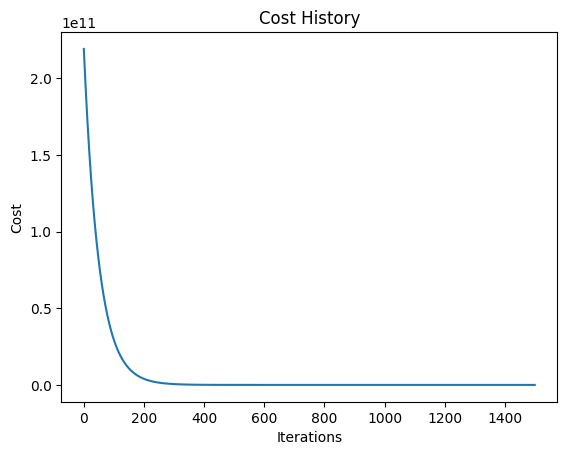

In [29]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()